# Clone Project Folder From GitHub

In [1]:
!git clone https://github.com/data-analytics-professionals/tweet-classification.git

Cloning into 'tweet-classification'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 62 (delta 43), reused 5 (delta 1), pack-reused 0
Unpacking objects: 100% (62/62), done.


# Install Required libraries

In [9]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-ssdx0j4c
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-ssdx0j4c
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp36-none-any.whl size=11742 sha256=c53a71bb990c90238c737de45ea1b352f258354dd162cf8ab14e8e49ee9113ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-87fpykch/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


# Load All Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import preprocess_kgptalkie as kgp


# Data Acquisition

In [20]:
# create pipeline with train.csv and store result in df
df = pd.read_csv("/content/tweet-classification/data/train.csv")

# Data Exploration

In [3]:
# check data within df
df.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [4]:
# check shape of df
df.shape

(7613, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


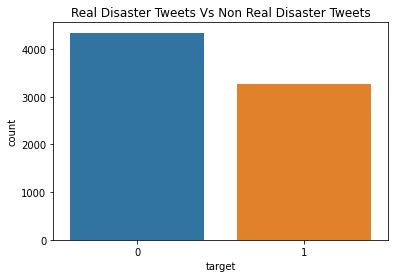

In [21]:
# Plot Count: Real Disaster Tweets Vs Non Real Disaster Tweets
sns.countplot('target', data=df)
plt.title('Real Disaster Tweets Vs Non Real Disaster Tweets')
plt.show()

In [22]:
# Return counts of unique values within target feature.
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

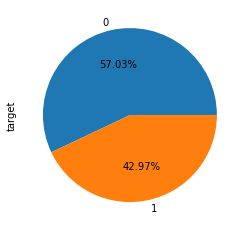

In [23]:
# Generate a pie plot for target feature.
df['target'].value_counts().plot.pie(autopct='%1.2f%%')

### Distribution in Tweets 


In [24]:
# Useful agregations from tweets 
df = kgp.get_basic_features(df)
df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


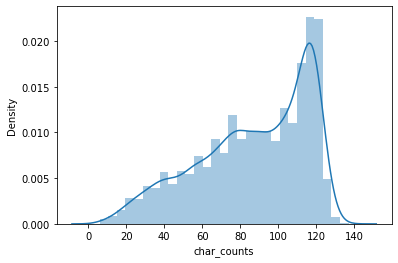

In [25]:
# Plot density distributio of a char_counts feature
sns.distplot(df['char_counts'])

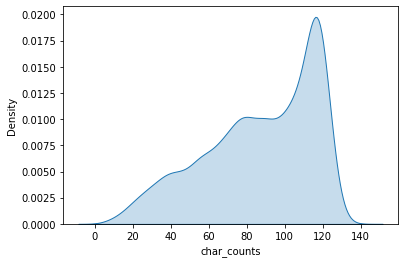

In [26]:
# PlotL Kernel Density Estimate (KDE) Plot for char_counts
sns.kdeplot(df['char_counts'], shade=True)

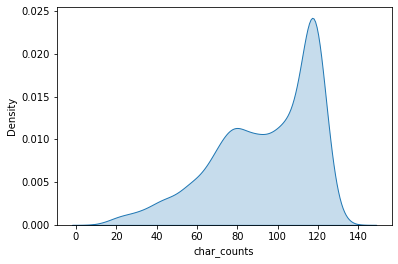

In [27]:
# Plot: Kernel Density Estimate (KDE) Plot for char_counts where target == 1
sns.kdeplot(df[df['target'] == 1]['char_counts'], shade=True)

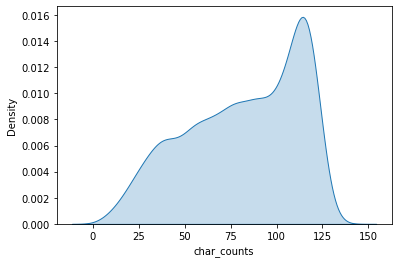

In [28]:
# Plot: Kernel Density Estimate (KDE) Plot for char_counts where target == 0
sns.kdeplot(df[df['target'] == 0]['char_counts'], shade=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


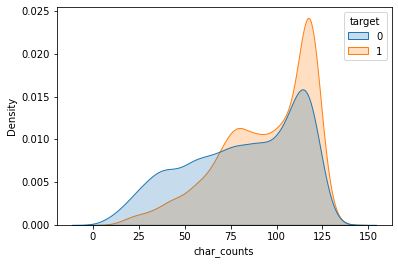

In [29]:
# Plot Kernel Density Estimate (KDE) Plot for char_counts where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['char_counts'], shade=True, color='red', hue=df['target'])
sns.kdeplot(df[df['target'] == 0]['char_counts'], shade=True, color='blue', hue=df['target'])


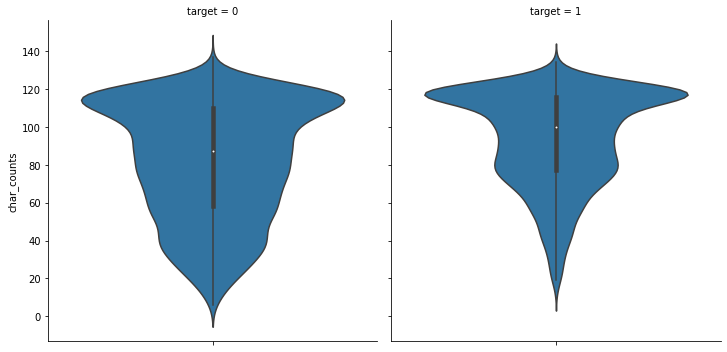

In [30]:
# Plot catplot
sns.catplot(y='char_counts', data=df, kind='violin', col='target')

### Number of Words, Average Words Length, and Stop Words Distribution in Tweets

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'KDE plot for word_counts')

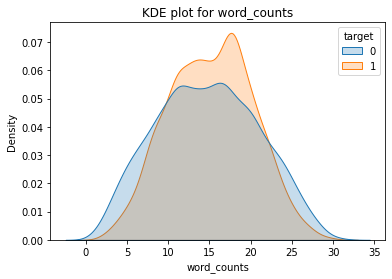

In [31]:
# Plot: Kernel Density Estimate (KDE) Plot for word_counts where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['word_counts'], shade=True, color='red', hue=df['target'])
sns.kdeplot(df[df['target'] == 0]['word_counts'], shade=True, color='blue', hue=df['target'])
plt.title('KDE plot for word_counts')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'KDE plot for avg_wordlength')

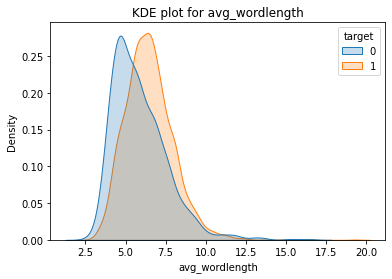

In [32]:
# Plot: Kernel Density Estimate (KDE) Plot for avg_wordlength where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['avg_wordlength'], shade=True, color='red', hue=df['target'])
sns.kdeplot(df[df['target'] == 0]['avg_wordlength'], shade=True, color='blue', hue=df['target'])
plt.title('KDE plot for avg_wordlength')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'KDE plot for stopwords_counts')

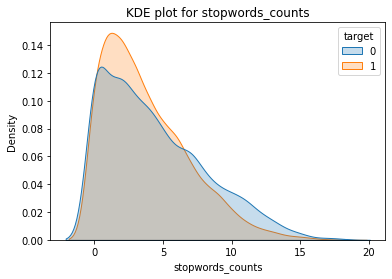

In [33]:
# PLot: Kernel Density Estimate (KDE) Plot for stopwords_counts_count where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['stopwords_counts'], shade=True, color='red', hue=df['target'])
sns.kdeplot(df[df['target'] == 0]['stopwords_counts'], shade=True, color='blue', hue=df['target'])
plt.title('KDE plot for stopwords_counts')


### Least and the Most Common Words